In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\yesha\AppData\Roaming\Python\Python311\site-packages\keras\api\preprocessing\image\__init__.py)

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\yesha\Downloads\plant diseases\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',  # Raw string to handle spaces and parentheses
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17474 files belonging to 38 classes.


In [15]:
import os

# Check if the file exists at the specified path
file_path = 'C:/Users/yesha/Downloads/plant_diseases/trained_plant_disease_model.keras'
print(os.path.exists(file_path))  # Should return True if the file exists


False


In [ ]:
import tensorflow as tf
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [2]:
import sys
print(sys.executable)


C:\Program Files\Python311\python.exe


In [12]:
import tensorflow as tf
print(tf.__version__)


2.18.0


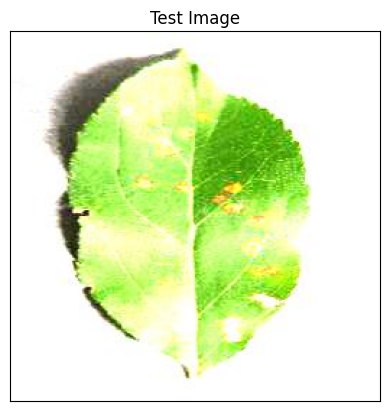

In [9]:
import cv2
import matplotlib.pyplot as plt  # Import matplotlib

# Image path
image_path = 'test/test/AppleCedarRust1.JPG'

# Read the image using OpenCV
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image using matplotlib
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()  # Show the image


All files in the directory: ['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoYellowCurlVirus6.JPG']
Filtered image files: ['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleS

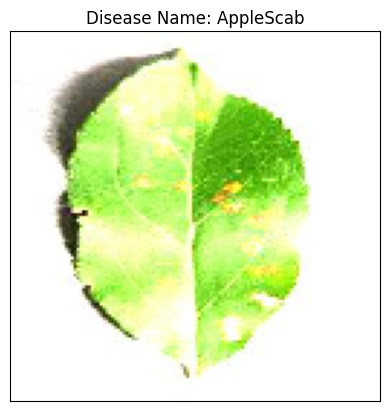

In [53]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Correct directory path for images
directory_path = r"C:\Users\yesha\Downloads\plant diseases.keras\test\test"

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"Directory does not exist: {directory_path}")
else:
    # Print all files in the directory for debugging
    all_files = os.listdir(directory_path)
    print("All files in the directory:", all_files)

    # Filter only valid image files
    valid_extensions = ('.jpg', '.jpeg', '.png')  # Add other valid extensions if needed
    files = [f for f in all_files if f.lower().endswith(valid_extensions) and os.path.isfile(os.path.join(directory_path, f))]
    print("Filtered image files:", files)

    if not files:
        print("No valid image files found in the directory!")
    else:
        print("Available image files:", files)

        # Select the first image file for testing
        image_path = os.path.join(directory_path, files[0])
        print("Selected file:", image_path)

        # Load and preprocess the image
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])  # Convert single image to a batch.

        # Load your trained model
        # Use the correct path for either the .h5 file or extracted SavedModel directory
        model_path = r'C:\Users\yesha\Downloads\plant diseases.keras\saved_model'  # Update to extracted folder path if needed
        # Alternatively, if you're using an .h5 model, use:
        # model_path = r'C:\Users\yesha\Documents\models\plant_disease_model.h5'

        # Load the model
        try:
            cnn = tf.keras.models.load_model(model_path)
        except Exception as e:
            print(f"Error loading model: {e}")
            exit()

        # Predict using the model
        predictions = cnn.predict(input_arr)
        print("Predictions:", predictions)

        # Find the index of the maximum prediction
        result_index = np.argmax(predictions)
        print("Prediction index:", result_index)

        # Define your class names list
        class_names = ['AppleCedarRust', 'AppleScab', 'CornCommonRust', 'PotatoEarlyBlight', 
                       'PotatoHealthy', 'TomatoEarlyBlight', 'TomatoHealthy', 'TomatoYellowCurlVirus']

        # Get the predicted disease name
        model_prediction = class_names[result_index]
        print(f"Disease Name: {model_prediction}")

        # Display the prediction with the image
        plt.imshow(image)
        plt.title(f"Disease Name: {model_prediction}")
        plt.xticks([])
        plt.yticks([])
        plt.show()


In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load Dataset (Replace with Plant Disease Dataset)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()  # Use your dataset
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize images

# Reshape for ML models (Flatten images)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# 1️⃣ CNN Model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Change 10 to number of classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
cnn_acc = cnn_model.evaluate(X_test, y_test)[1] * 100

# 2️⃣ Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_flat, y_train.ravel())
svm_acc = accuracy_score(y_test, svm_model.predict(X_test_flat)) * 100

# 3️⃣ Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flat, y_train.ravel())
rf_acc = accuracy_score(y_test, rf_model.predict(X_test_flat)) * 100

# 4️⃣ K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat, y_train.ravel())
knn_acc = accuracy_score(y_test, knn_model.predict(X_test_flat)) * 100

# 5️⃣ Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_flat, y_train.ravel())
lr_acc = accuracy_score(y_test, lr_model.predict(X_test_flat)) * 100

# Print Accuracy Comparison
print("\n🔍 Model Accuracy Comparison:")
print(f"✅ CNN Accuracy: {cnn_acc:.2f}%")
print(f"✅ SVM Accuracy: {svm_acc:.2f}%")
print(f"✅ Random Forest Accuracy: {rf_acc:.2f}%")
print(f"✅ KNN Accuracy: {knn_acc:.2f}%")
print(f"✅ Logistic Regression Accuracy: {lr_acc:.2f}%")


MemoryError: Unable to allocate 234. MiB for an array with shape (10000, 32, 32, 3) and data type float64